In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./reports/efficientnet_b0_2022_4_7_15_16_44.csv")
df

,Unnamed: 0,epoch,train/eval,batch_size,loss,acc,correct
0,0,0,train,32,171.924728,0.000,0
1,0,0,train,32,168.238312,0.000,0
2,0,0,train,32,170.620438,0.000,0
3,0,0,train,32,167.380630,0.000,0
4,0,0,train,32,167.383453,3.125,1
...,...,...,...,...,...,...,...
16315,0,63,val,32,138.034409,15.625,5
16316,0,63,val,32,141.214066,12.500,4
16317,0,63,val,32,154.025055,3.125,1
16318,0,63,val,32,137.754715,15.625,5


In [3]:
df_train = df[ df["train/eval"]=="train"]
df_train

,Unnamed: 0,epoch,train/eval,batch_size,loss,acc,correct
0,0,0,train,32,171.924728,0.000,0
1,0,0,train,32,168.238312,0.000,0
2,0,0,train,32,170.620438,0.000,0
3,0,0,train,32,167.380630,0.000,0
4,0,0,train,32,167.383453,3.125,1
...,...,...,...,...,...,...,...
16264,0,63,train,32,126.448334,21.875,7
16265,0,63,train,32,112.510048,40.625,13
16266,0,63,train,32,107.832207,40.625,13
16267,0,63,train,32,106.270157,34.375,11


In [10]:
df_train_epoch = df_train[["correct", "batch_size", "epoch", "loss"]].groupby(by="epoch").sum()
df_train_epoch["acc"] = df_train_epoch["correct"] / df_train_epoch["batch_size"]
df_train_epoch["loss_mean"] = df_train_epoch["loss"] / df_train_epoch["batch_size"]

df_train_epoch

,correct,batch_size,loss,acc,loss_mean
epoch,,,,,
0,200,6501,33592.190925,0.030764,5.167234
1,789,6501,29733.099942,0.121366,4.573619
2,1112,6501,27826.580948,0.171051,4.280354
3,1334,6501,26524.134535,0.205199,4.080008
4,1555,6501,25607.222800,0.239194,3.938967
...,...,...,...,...,...
59,2064,6501,23554.729541,0.317490,3.623247
60,2020,6501,23659.703784,0.310721,3.639395
61,2034,6501,23518.513151,0.312875,3.617676


<AxesSubplot:xlabel='epoch'>

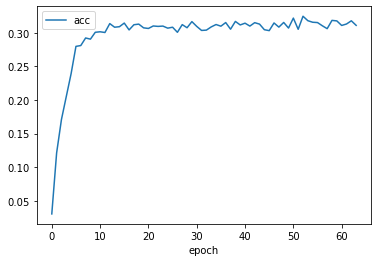

In [5]:
df_train_epoch[["acc"]].plot()

<AxesSubplot:xlabel='epoch'>

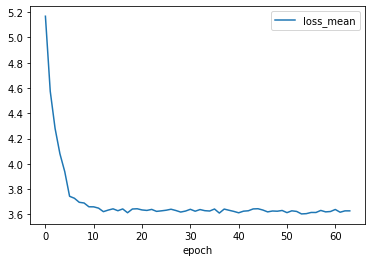

In [11]:
df_train_epoch[["loss_mean"]].plot()

In [12]:
df_val = df[ df["train/eval"]=="val" ]
df_val

,Unnamed: 0,epoch,train/eval,batch_size,loss,acc,correct
204,0,0,val,32,147.571106,15.625,5
205,0,0,val,32,158.392792,0.000,0
206,0,0,val,32,155.001678,9.375,3
207,0,0,val,32,157.542847,3.125,1
208,0,0,val,32,153.656586,6.250,2
...,...,...,...,...,...,...,...
16315,0,63,val,32,138.034409,15.625,5
16316,0,63,val,32,141.214066,12.500,4
16317,0,63,val,32,154.025055,3.125,1
16318,0,63,val,32,137.754715,15.625,5


In [13]:
df_val_epoch = df_val[ ["epoch", "batch_size", "correct"] ].groupby(by="epoch").sum()
df_val_epoch["acc"] = df_val_epoch["correct"] / df_val_epoch["batch_size"]
df_val_epoch

,batch_size,correct,acc
epoch,,,
0,1625,86,0.052923
1,1625,117,0.072000
2,1625,138,0.084923
3,1625,145,0.089231
4,1625,157,0.096615
...,...,...,...
59,1625,162,0.099692
60,1625,160,0.098462
61,1625,151,0.092923


<AxesSubplot:xlabel='epoch'>

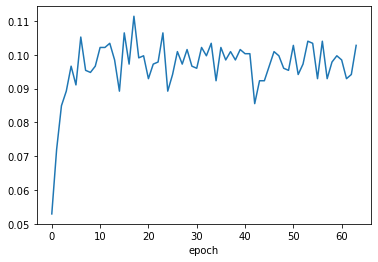

In [14]:
df_val_epoch["acc"].plot()